# TensorFlow Tutorial - Part 3 (Clean)

This code is provided as supplementary material of the lecture Machine Learning and Optimization in Communications (MLOC).<br>

This code illustrates
* Example of analyzing models in Tensorboard
* Clean version of code without any Summary writers to show the model itself

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

Generate data coming from a simple polynomial and corrupt with noise

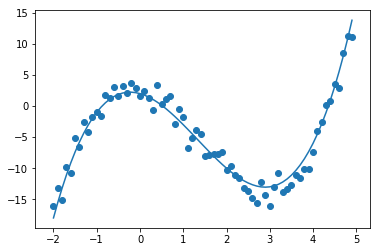

In [3]:
x = np.arange(-2, 5, 0.1)
y = x**3 - 4*x**2 - 2*x + 2
y_noise = y + np.random.normal(0, 1.5, size=(len(x),))
plt.close("all")
plt.plot(x, y)
plt.scatter(x, y_noise);

In [4]:
# simple function to get a random mini-batch
def get_batch(x, y, batch_size=20):
    idxs = np.random.randint(0, len(x), (batch_size))
    return x[idxs], y[idxs]

Define graph by model, use 2 hidden layers, one with ReLU and the other one with tanh activation (overkill for this example, but for illustration purposes).

We introduce a new type of TensorFlow variables, the ones that can be trained. These belong to `tf.Variable`

In [5]:
mini_batch_size = 10

neurons_H1 = 4
neurons_H2 = 5

input_x = tf.placeholder(tf.float32, shape=(mini_batch_size))
input_y = tf.placeholder(tf.float32, shape=(mini_batch_size))

tf_x = tf.constant(x, dtype=tf.float32, name='x_range')

# tf.truncated_normal is the initializer of the variable
# specify the variables of our model
w1 = tf.Variable(tf.truncated_normal([1,neurons_H1], stddev=0.8))
b1 = tf.Variable(tf.truncated_normal([neurons_H1], stddev=0.8))

W2 = tf.Variable(tf.truncated_normal([neurons_H1, neurons_H2], stddev=0.8))
b2 = tf.Variable(tf.truncated_normal([neurons_H2], stddev=0.8))

w3 = tf.Variable(tf.truncated_normal([neurons_H2,1], stddev=0.8))


# build graph
nn = tf.expand_dims(input_x, 1)
nn = tf.nn.tanh(tf.matmul(nn, w1)+b1)
nn = tf.nn.tanh(tf.matmul(nn, W2)+b2)
output = tf.squeeze(tf.matmul(nn,w3)) # squeeze removes the excess dimensions    

    
loss = tf.reduce_mean(tf.pow(output-input_y,2))

    
optimizer = tf.train.AdamOptimizer(name='Optimizer').minimize(loss)

# build side graph that generates the output from y
nn = tf.expand_dims(tf_x, 1)
nn = tf.nn.tanh(tf.matmul(nn, w1)+b1)
nn = tf.nn.tanh(tf.matmul(nn, W2)+b2)
y_est = tf.squeeze(tf.matmul(nn,w3))

Instructions for updating:
Colocations handled automatically by placer.


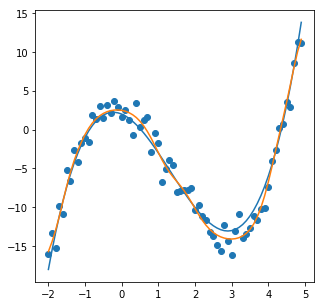

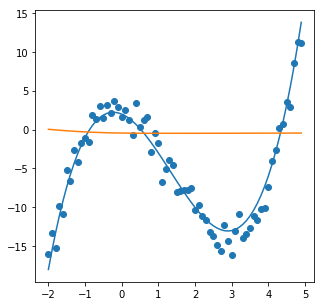

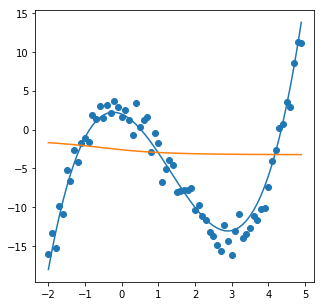

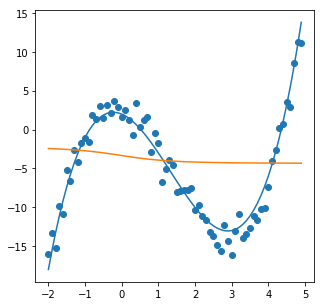

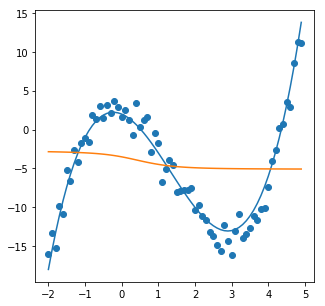

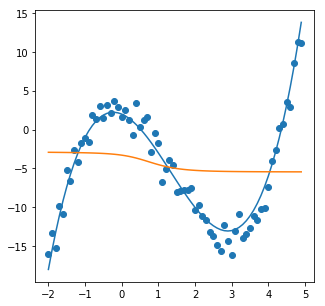

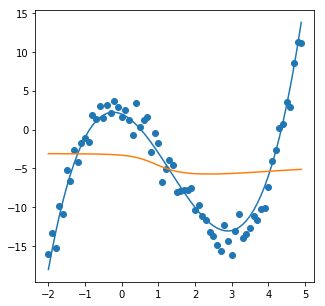

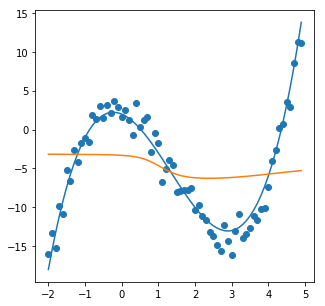

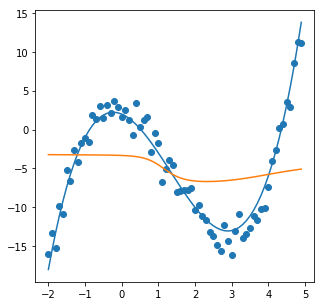

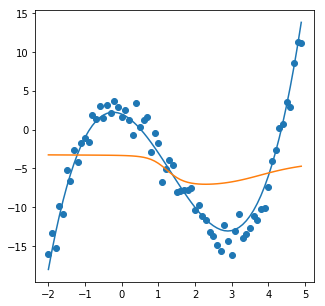

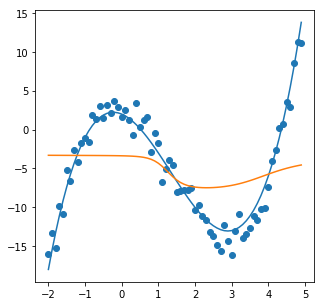

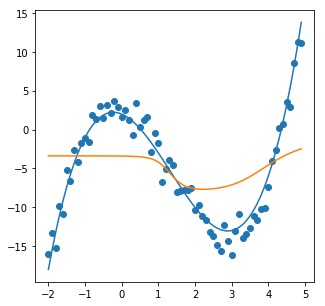

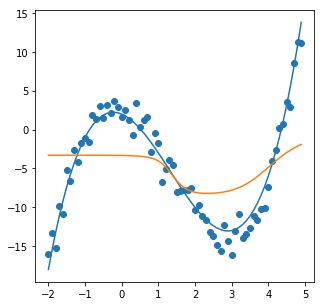

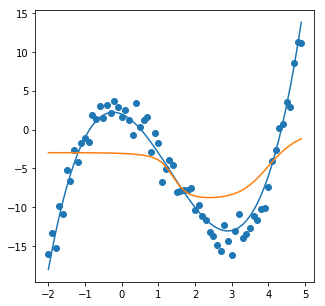

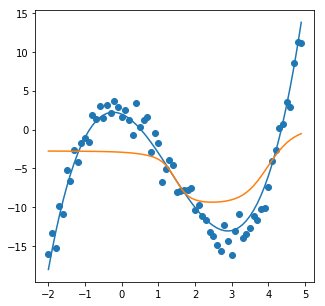

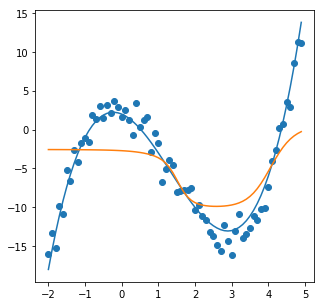

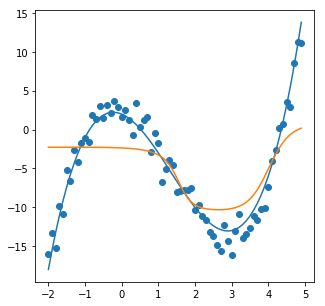

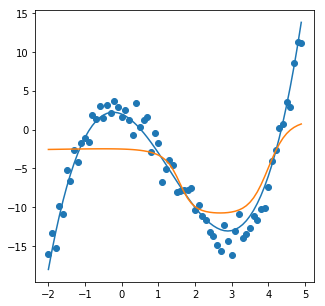

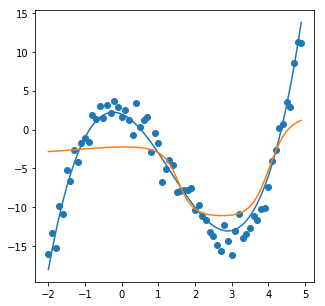

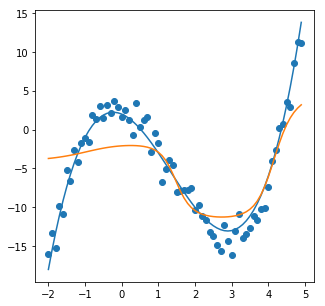

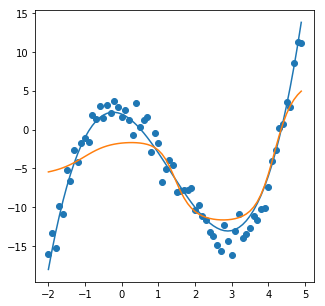

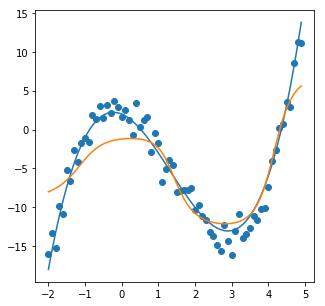

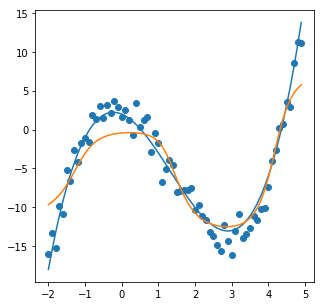

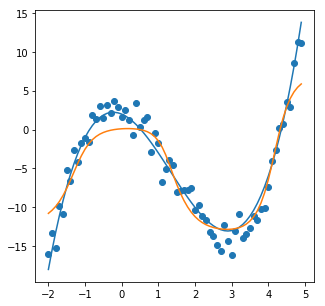

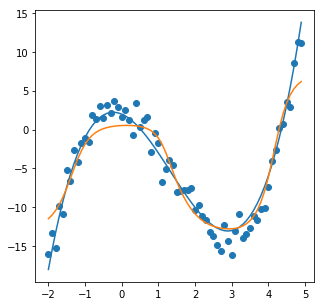

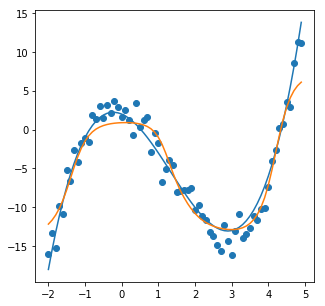

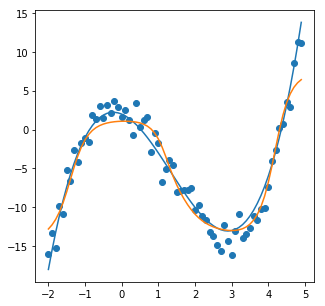

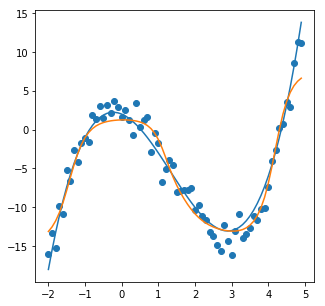

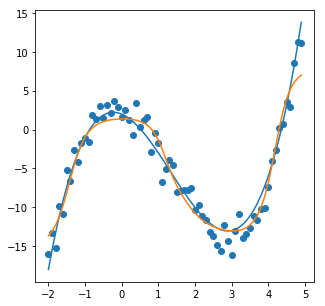

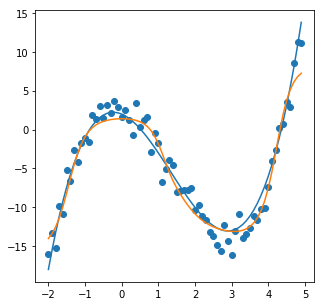

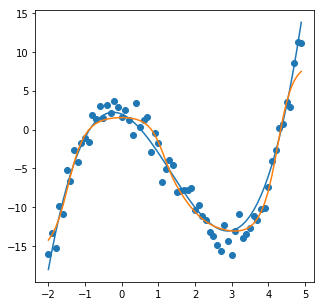

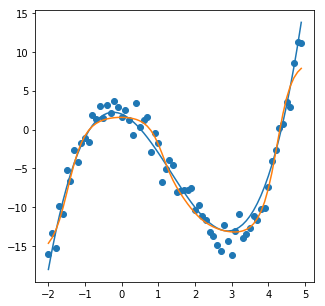

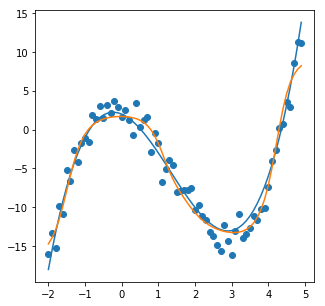

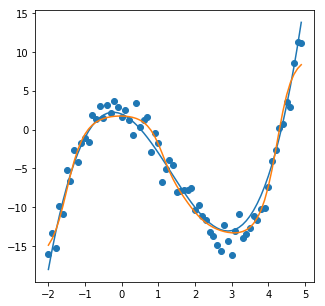

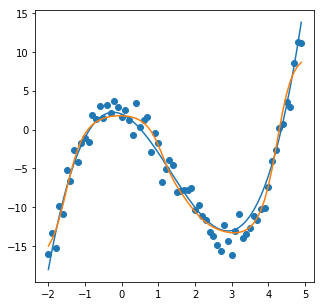

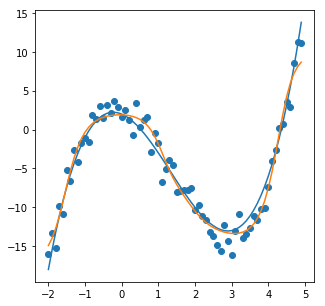

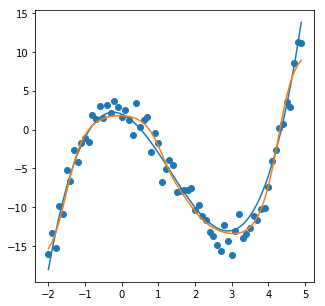

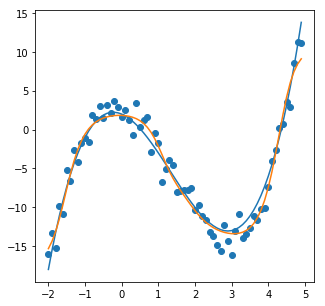

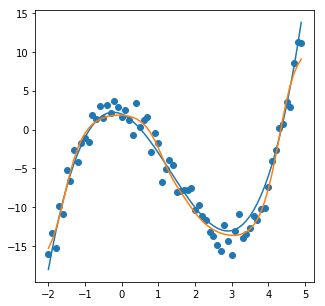

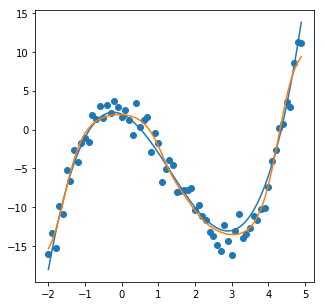

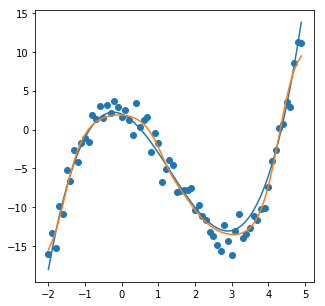

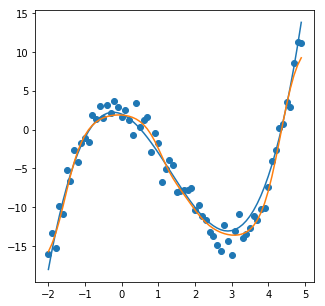

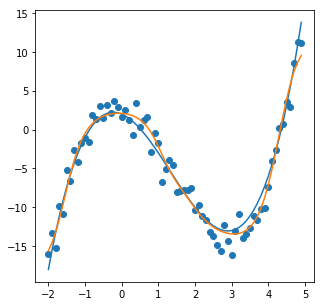

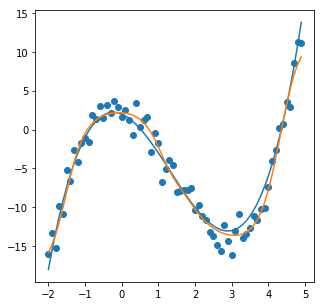

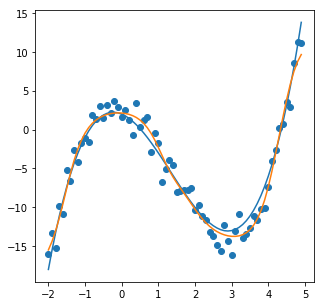

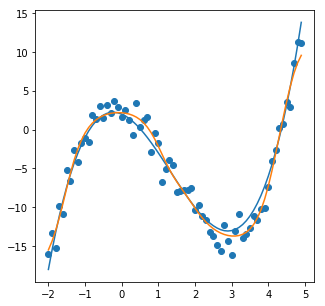

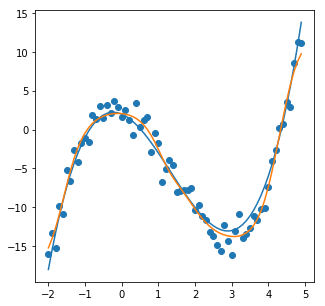

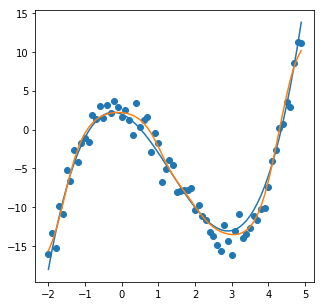

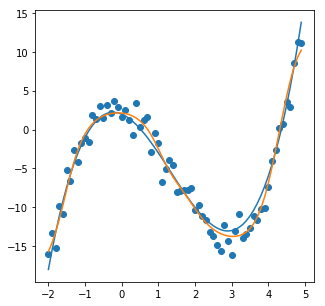

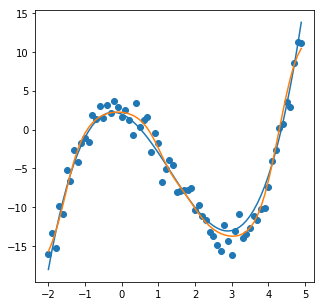

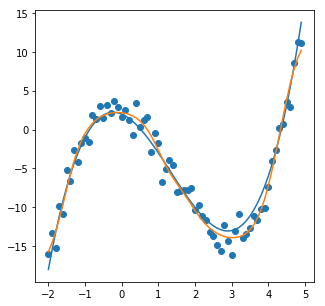

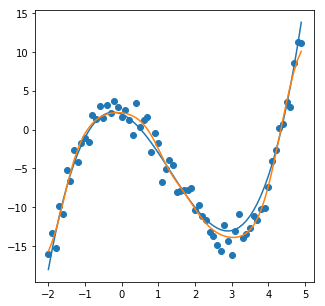

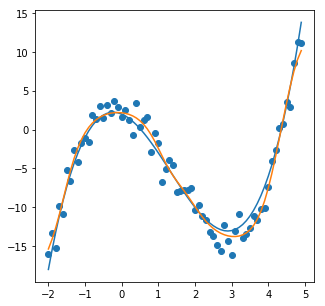

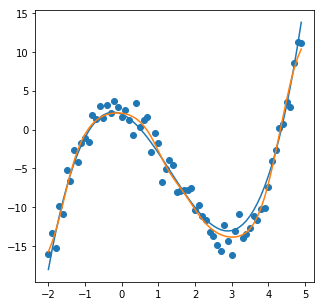

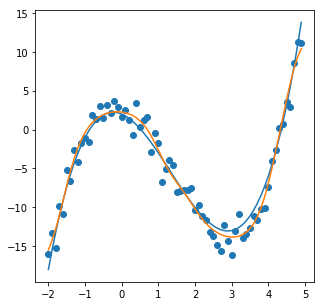

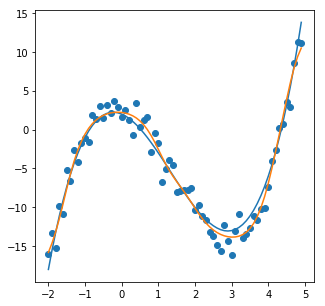

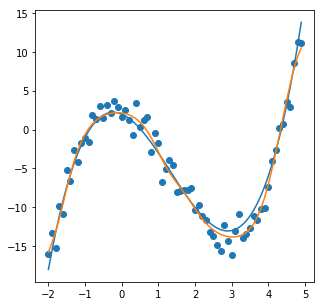

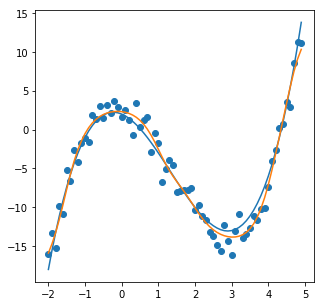

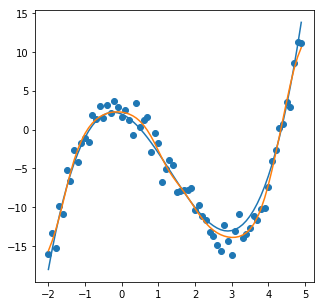

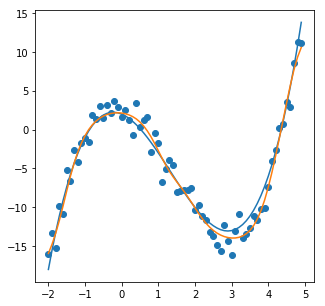

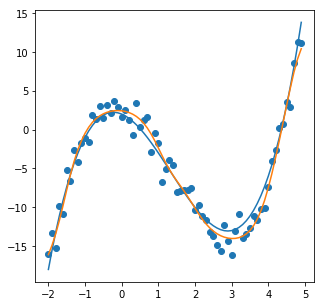

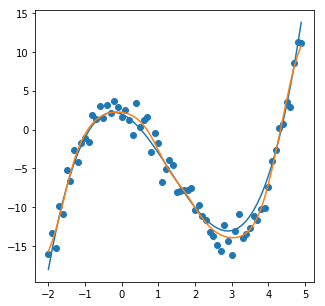

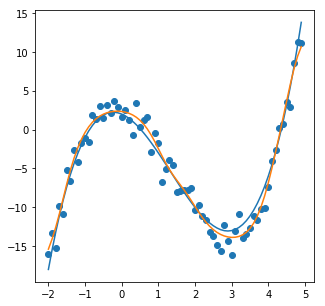

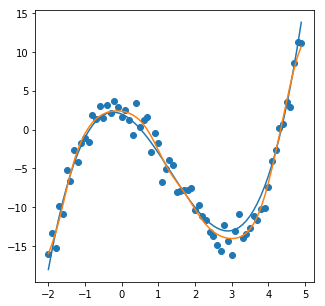

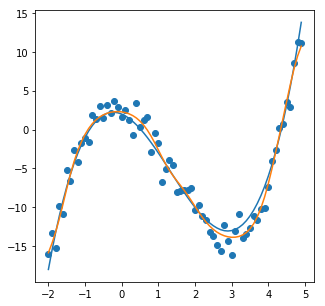

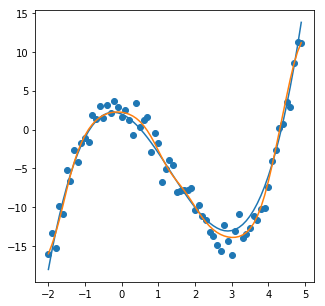

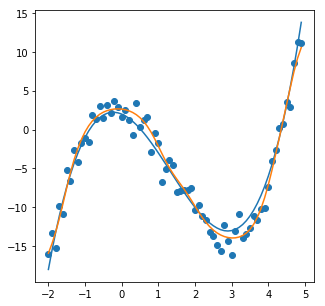

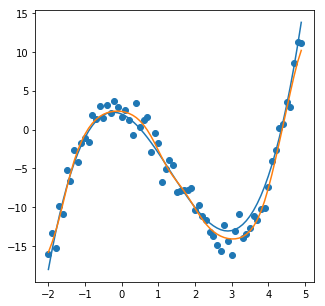

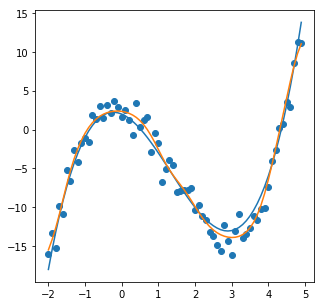

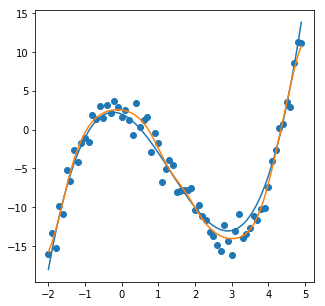

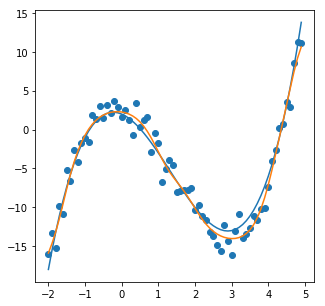

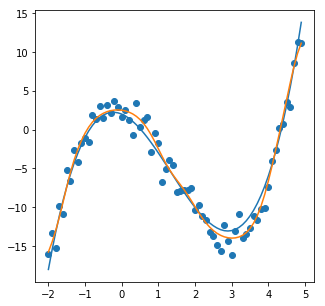

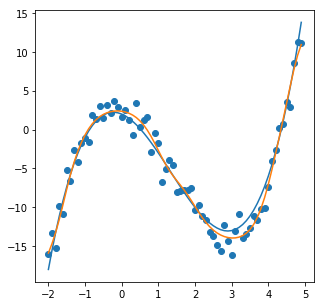

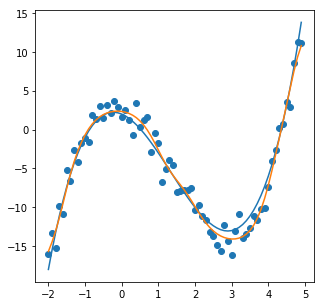

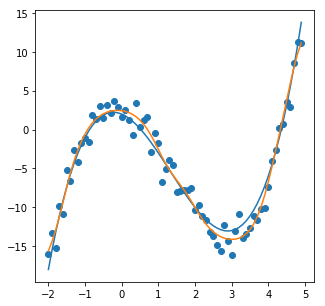

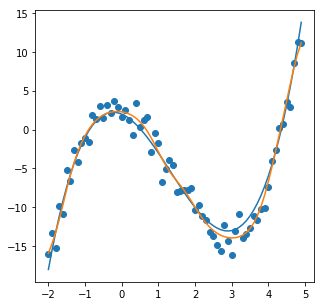

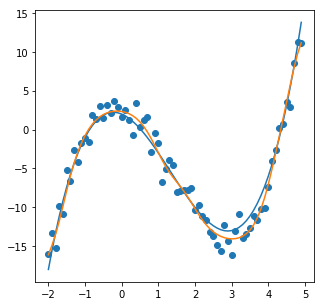

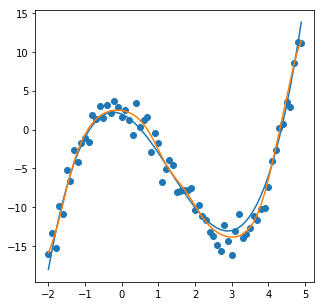

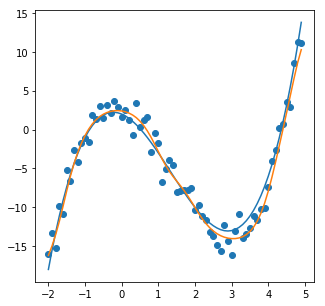

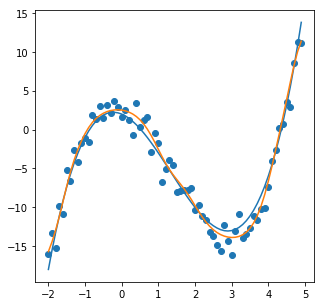

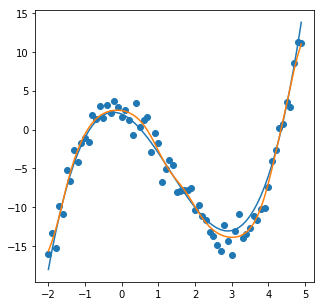

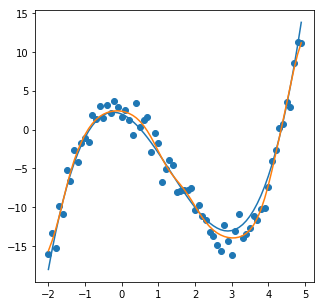

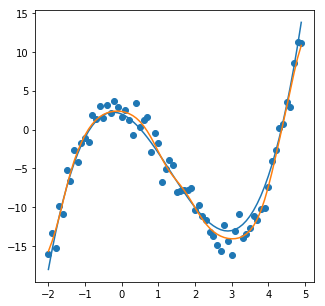

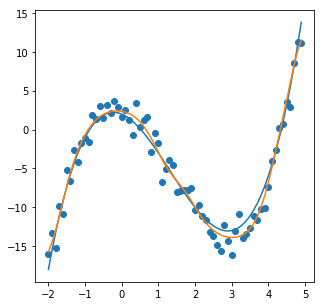

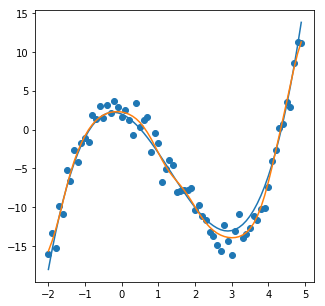

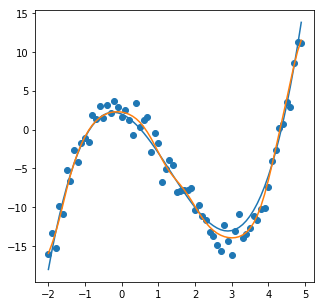

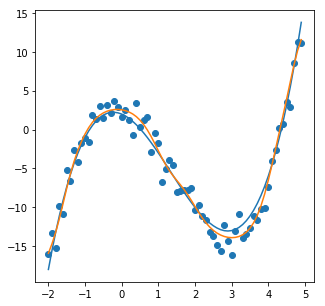

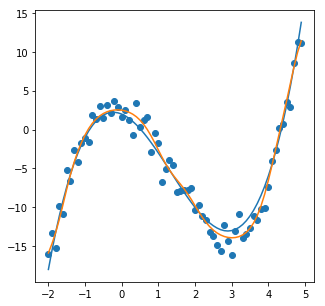

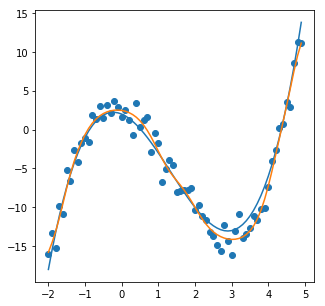

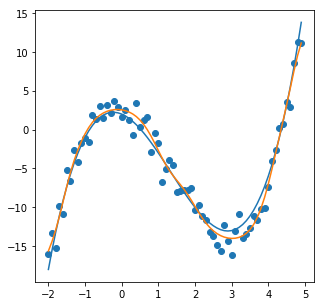

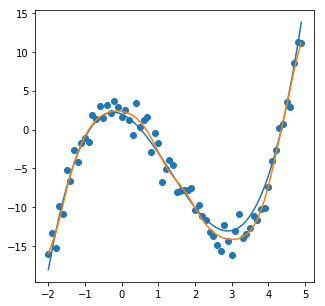

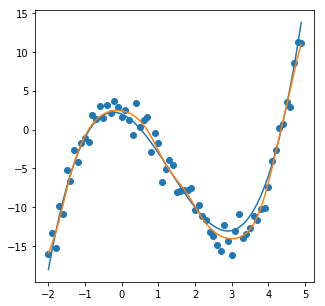

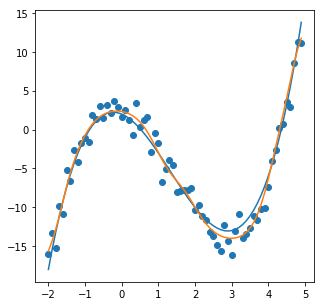

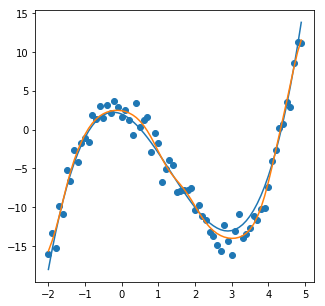

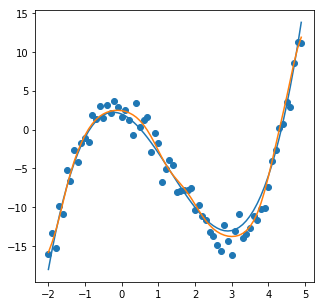

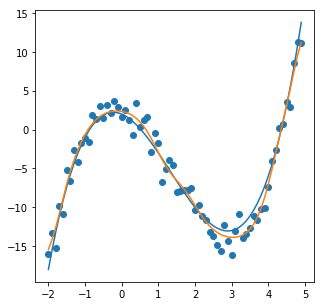

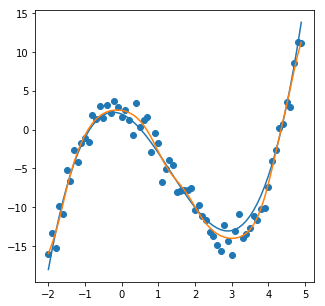

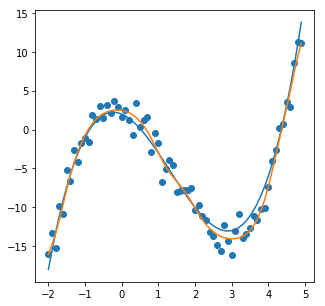

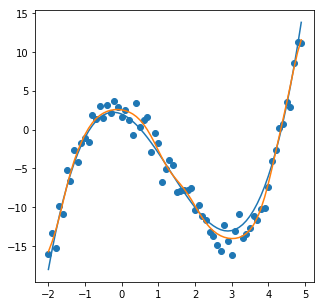

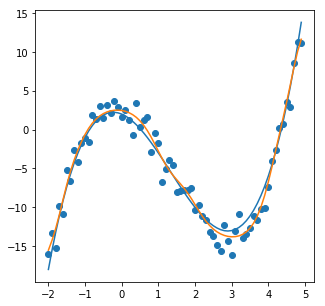

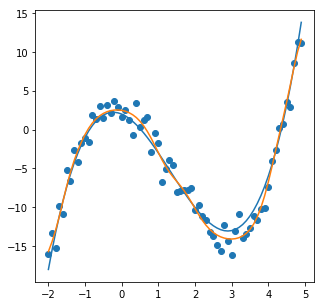

In [6]:
num_iter = 100*300
image_cycle = 300

with tf.Session() as session:
    # initialize variables
    tf.global_variables_initializer().run()

    print('Initialized')
    for step in range(num_iter):    
        batch_x, batch_y = get_batch(x,y_noise, mini_batch_size)
        feed_dict = {input_x : batch_x, input_y : batch_y}
        _ = session.run(optimizer, feed_dict=feed_dict)
        
        # plot result of learning
        if step % image_cycle == 0:
            fig,ax = plt.subplots(1,1,figsize=(5,5))        
            plt.scatter(x, y_noise)
            plt.plot(x, y)
            plt.plot(x, y_est.eval())
            display.clear_output(wait=True)
            display.display(plt.gcf())        